In [2]:

import ibmos2spark
# @hidden_cell
credentials = {
    'endpoint': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'service_id': 'iam-ServiceId-1f26e43e-fff7-4b02-8ba8-b47e72291de3',
    'iam_service_endpoint': 'https://iam.ng.bluemix.net/oidc/token',
    'api_key': 'pCr-WLRo5ICOsYAyVtRlXSD2jslQxnDaOHCs2O1ELFdI'
}

configuration_name = 'os_d50263714a754477a3515e7a0e83a43a_configs'
cos = ibmos2spark.CloudObjectStorage(sc, credentials, configuration_name, 'bluemix_cos')

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df2 = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(cos.url('ITE00100550_ITE00100554.csv', 'ibmcourserafundamentalsofscaleabl-donotdelete-pr-wcwi02r7qojnot'))
# df.take(5)


spark = SparkSession.builder.getOrCreate()
df = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(cos.url('lesultmatedos.csv', 'ibmcourserafundamentalsofscaleabl-donotdelete-pr-wcwi02r7qojnot'))

spark = SparkSession.builder.getOrCreate()
df1 = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(cos.url('ASN00063076_ASN00058056_ASN00024515_ASN00087014.csv', 'ibmcourserafundamentalsofscaleabl-donotdelete-pr-wcwi02r7qojnot'))

In [3]:


import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
from queue import Queue
import pandas as pd
import json
%matplotlib inline

#pyspark imports

from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler,Normalizer,StringIndexer,OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import PCA
from pyspark.ml.feature import MinMaxScaler
import random
random.seed(20)

Using TensorFlow backend.


In [4]:
# number o days 0.01 inch o pouring

# number o days 0.1 inch of pouring

# number o days 1 inch of pouring

# total monthly rain

# highest daily total a month


# Cleanup data function

In [5]:
def CleanDF(df):
    df_cleaned = df \
        .withColumn("DP01", df.DP01.cast('double')) \
        .withColumn("DP10", df.DP10.cast('double')) \
        .withColumn("DP1X", df.DP1X.cast('double')) \
        .withColumn("PRCP", df.PRCP.cast('double')) \
        .withColumn("EMXP", df.EMXP.cast('double')) \
        .withColumn("LATITUDE", df.LATITUDE.cast('double')) \
        .withColumn("LONGITUDE", df.LONGITUDE.cast('double')) 

    df_cleaned = df_cleaned.select('*', (df.DATE[6:6]).alias('MONTH').cast("double"))
    df_cleaned = df_cleaned.select(["DP01","DP10","DP1X","EMXP","MONTH","LATITUDE","LONGITUDE","PRCP"])
    df_cleaned = df_cleaned.dropna()
    return df_cleaned

In [6]:
df.limit(20).toPandas().keys()
df = CleanDF(df)
df2 = CleanDF(df2)
df1= CleanDF(df1)

In [7]:
def CorrMatrix(data,vectorAssembler,scaler):
    df_pipeline = Pipeline(stages=[vectorAssembler,scaler])
    df_pipline = df_pipeline.fit(df)
    model = df_pipline.transform(df)
    print(Correlation.corr(model,"features").head()[0].toArray())


In [8]:

def ScatterPlots(df):
    x1 = np.array(df.select("DP01").collect()).flatten()
    x2 = np.array(df.select("DP10").collect()).flatten()
    x3 = np.array(df.select("LONGITUDE").collect()).flatten()
    x4 = np.array(df.select("LATITUDE").collect()).flatten()
    fig,axes = plt.subplots(2,3,figsize=(30,10))
    axes[0,0].scatter(x1,x2)
    axes[0,1].scatter(x1,x3)
    axes[0,2].scatter(x2,x3)
    axes[1,0].scatter(x1,x4)
    axes[1,1].scatter(x2,x4)
    axes[1,2].scatter(x3,x4)
    plt.show()

# ScatterPlots(df)

In [9]:
def RegressionMetrics(prediction):
    evaluator = RegressionEvaluator(
    labelCol="PRCP", predictionCol="prediction", metricName="rmse")
    rmse = evaluator.evaluate(prediction)
    evaluatormae = RegressionEvaluator(
    labelCol="PRCP", predictionCol="prediction", metricName="mae")
    mae = evaluatormae.evaluate(prediction)
    return rmse,mae

def PlotCorrelation(prediction):
    

    ylabel = prediction.toPandas()["PRCP"]
    ypred = prediction.toPandas()["prediction"]
    # plt.scatter(x,ylabel)
    plt.scatter(ylabel,ypred,c='green')
    plt.xlabel("Real PRCP")
    plt.ylabel("Predicted PRCP")
    a = np.corrcoef(ylabel,ypred)
    xmax = ylabel.max()
    x = np.arange(xmax+100)
    plt.plot(a[0][1]*x,c="red")
    # ax1.xcorr(ylabel, ypred, us, maxlags=50, normed=True, lw=2)
    # plt.figsize(20,20)
    plt.show()
#     print("RMSE = %0.3f, MAE = %0.3f"%regression_metrics(prediction))
    print("correlation: %0.3f" %a[1][0])
    # predictionlr.limit(10).toPandas()[['PRCP','prediction']]
    
def PlotResiduals(prediction):
    ylabel = prediction.toPandas()["PRCP"]
    ypred = prediction.toPandas()["prediction"]
    x = (ylabel-ypred)
    plt.plot(x)
    plt.show()

In [10]:
def SplitTraining(df):
    splits = df.randomSplit([0.8, 0.2])
    return splits[0],splits[1]

def ModelExecutor(df_train,df_test,vectorAssembler,scaler,pca,method):
    pipeline = Pipeline(stages=[vectorAssembler,scaler,pca,method])
    model = pipeline.fit(df_train)
    prediction = model.transform(df_test)
    return model,prediction



# Initial feature and pipeline parameters

In [11]:
df_train,df_test = SplitTraining(df)
vectorAssembler = VectorAssembler(inputCols=["DP01","DP10","DP1X","EMXP","MONTH","LATITUDE","LONGITUDE"],outputCol="features")
scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")
normalizer = Normalizer(inputCol="pcaFeatures",outputCol="Features_Norm",p=1.0)
CorrMatrix(df_train,VectorAssembler(inputCols=["DP01","DP10","DP1X","EMXP","MONTH","LATITUDE","LONGITUDE","PRCP"],outputCol="features"),scaler)

[[ 1.          0.89547631  0.41113952  0.41067014  0.02504129  0.25781923
  -0.12235036  0.64235272]
 [ 0.89547631  1.          0.56322112  0.52631785  0.02873142  0.16911979
  -0.12127838  0.78289473]
 [ 0.41113952  0.56322112  1.          0.74776962 -0.00356856 -0.00821432
  -0.06034898  0.88153409]
 [ 0.41067014  0.52631785  0.74776962  1.          0.00283709 -0.01060556
  -0.03895828  0.82522501]
 [ 0.02504129  0.02873142 -0.00356856  0.00283709  1.          0.00297946
  -0.00596118  0.00781924]
 [ 0.25781923  0.16911979 -0.00821432 -0.01060556  0.00297946  1.
  -0.72116878  0.05307791]
 [-0.12235036 -0.12127838 -0.06034898 -0.03895828 -0.00596118 -0.72116878
   1.         -0.07725346]
 [ 0.64235272  0.78289473  0.88153409  0.82522501  0.00781924  0.05307791
  -0.07725346  1.        ]]


## In the correlation matrix we can see that 3 features correlate with other features  above 0.6 (which is the threshold I chose for heavy correlation)
## Curious is the fact that the label value PRCP does not seem to be correlated to Month Lattitude and Longitude so we will check our best performing model withouth these features

In [12]:
#So we use pca to reduce the features to 4 from 7
pca = PCA(k=4, inputCol="scaledFeatures", outputCol="pcaFeatures")

# Linear Regression

(56.53211175640632, 32.91902544898204)


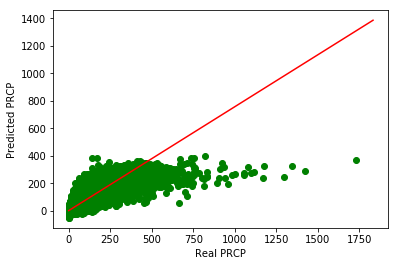

correlation: 0.757


In [13]:
lr = LinearRegression(labelCol="PRCP",featuresCol="pcaFeatures",maxIter=100,regParam=0.0,elasticNetParam=0.0)
modellr,predictionlr = ModelExecutor(df_train,df_test,vectorAssembler,scaler,pca,lr)

print(RegressionMetrics(predictionlr))
PlotCorrelation(predictionlr)
# PlotResiduals(predictionlr)


In [35]:

# # First test for different values of regulizer
# paramlist = [0.0,0.001,0.01,0.1,1]
# # sc.setLogLevel("ERROR")
# kfolded = []
# for i in range(10):
#     predictionsevals = []
#     splits = df.randomSplit([0.8, 0.2])
#     df_train = splits[0]
#     df_test = splits[1]
#     for k in paramlist:
#         lr = LinearRegression(labelCol="PRCP",featuresCol="pcaFeatures",maxIter=100,regParam=k,elasticNetParam=0.0)
#         pipeline = Pipeline(stages=[vectorAssembler,scaler,pca,lr])
#         model = pipeline.fit(df_train)
#         prediction = model.transform(df_test)
#         predictionsevals.append(regression_metrics(prediction))
#     kfolded.append(np.array(predictionseval))

In [36]:
# z = np.array(kfolded)
# meansofparams = []
# for i in range(z.shape[1]):

#     meansofparams.append(np.mean(z[:,i]))
# print (meansofparams)

#  Random Forest Regressor

(51.569354672148584, 28.830652153723886)


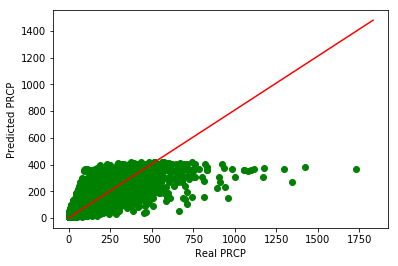

correlation: 0.808


In [37]:

rfr = RandomForestRegressor(labelCol="PRCP",featuresCol="pcaFeatures")
modelrfr,predictionrfr = ModelExecutor(df_train,df_test,vectorAssembler,scaler,pca,rfr)

print(RegressionMetrics(predictionrfr))
PlotCorrelation(predictionrfr)
# PlotResiduals(predictionrfr)

# GBT regressor

(42.93940318019458, 23.51055470578141)


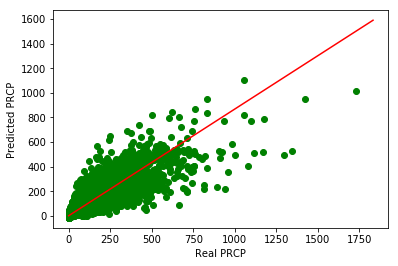

correlation: 0.868


In [38]:
gbt = GBTRegressor(labelCol="PRCP",featuresCol="pcaFeatures", maxIter=100)

modelgbt,predictiongbt = ModelExecutor(df_train,df_test,vectorAssembler,scaler,pca,gbt)
print(RegressionMetrics(predictiongbt))
PlotCorrelation(predictiongbt)
# PlotResiduals(predictiongbt)

# Increasing the iteration's does improve the performance on the training set

(42.14036655883949, 23.045309104410038)


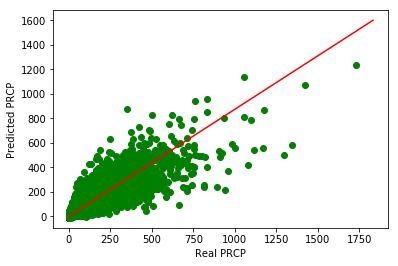

correlation: 0.873


In [39]:
gbt = GBTRegressor(labelCol="PRCP",featuresCol="pcaFeatures", maxIter=150)

modelgbt3,predictiongbt3 = ModelExecutor(df_train,df_test,vectorAssembler,scaler,pca,gbt)
print(RegressionMetrics(predictiongbt3))
PlotCorrelation(predictiongbt3)
# PlotResiduals(predictiongbt3)

# Removing Month lattitude and longitude from the features


(27.947988774866282, 11.85237516534253)


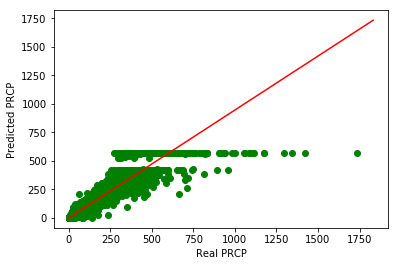

correlation: 0.946


In [40]:
vectorAssembler = VectorAssembler(inputCols=["DP01","DP10","DP1X","EMXP"],outputCol="features")
pca = PCA(k=2, inputCol="scaledFeatures", outputCol="pcaFeatures")

gbt = GBTRegressor(labelCol="PRCP",featuresCol="pcaFeatures", maxIter=100)

modelgbtrem,predictiongbtrem = ModelExecutor(df_train,df_test,vectorAssembler,scaler,pca,gbt)
print(RegressionMetrics(predictiongbtrem))
PlotCorrelation(predictiongbtrem)
# PlotResiduals(predictiongbtrem)

# Testing Models against Test data

### Normal GBT

(35.83373120026664, 24.9122125994782)


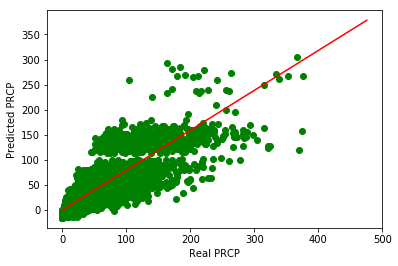

correlation: 0.795


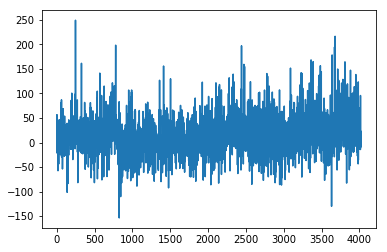

In [41]:
testpredgbt = modelgbt.transform(df2)
print(RegressionMetrics(testpredgbt))
PlotCorrelation(testpredgbt)
PlotResiduals(testpredgbt)

### 150 iterations GBT

(35.76707378056701, 24.763664666657114)


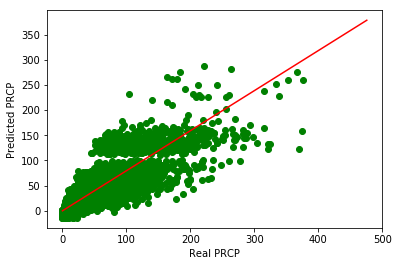

correlation: 0.796


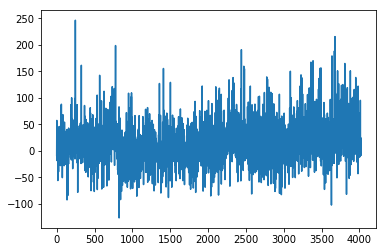

In [42]:
testpredgbt3 = modelgbt3.transform(df2)
print(RegressionMetrics(testpredgbt3))
PlotCorrelation(testpredgbt3)
PlotResiduals(testpredgbt3)

### Without Month,Lattitude,Longitude

(16.018272142438242, 10.225446903365041)


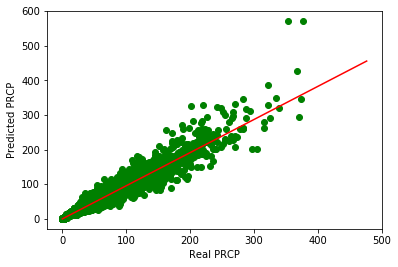

correlation: 0.957


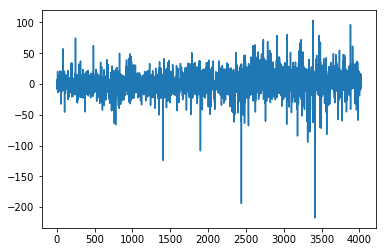

In [43]:
testpredgbtrem = modelgbtrem.transform(df2)
print(RegressionMetrics(testpredgbtrem))
PlotCorrelation(testpredgbtrem)
PlotResiduals(testpredgbtrem)

# Conclusion

As can be seen from our code above after testing with both a linear regression, a randomtree and a gradient boosted tree.<br/>
We selected the gradient boosted tree as the best performer.<br/>
Using different sets of iterations we found that the algorithm does not significantly benefit from more iterations. <br/>
Also using our correlation matrix assesment we found that Month Lattitude and Longitude had no real correlation with PRCP (our to be estimated value)
removing these features from our machine learning model we managed to perform significantly better.

In [44]:


# testpredlr= modellr.transform(df2)
# print(RegressionMetrics(testpredlr))
# PlotCorrelation(testpredlr)
# PlotResiduals(testpredlr)

In [45]:
# lr = LinearRegression(labelCol="PRCP",featuresCol="pcaFeatures",maxIter=100,regParam=0.0,elasticNetParam=0.0)
# modellr2,predictionlr2 = ModelExecutor(df_train,df_test,vectorAssembler,scaler,pca,lr)

# print(RegressionMetrics(predictionlr2))
# testpredlr2= modellr2.transform(df2)
# print(RegressionMetrics(testpredlr2))
# PlotCorrelation(testpredlr2)
# PlotResiduals(testpredlr2)

# KERAS

In [22]:
def CreateKerasModel(vectorAssembler,scaler,pca,data):
    pipe = Pipeline(stages=[vectorAssembler,scaler,pca])
    model = pipe.fit(data)
    return model
def CreateFeatures(model,data):
    transformed = model.transform(data)
    return transformed

def RetrieveFeatures(data,vectorAssembler = vectorAssembler,scaler = scaler,pca = pca):
    model = CreateKerasModel(vectorAssembler,scaler,pca,data)
    transmodel = CreateFeatures(model,data)
    x = transmodel.toPandas()["pcaFeatures"].map(lambda x:[x[0],x[1]])
    y = transmodel.toPandas()["PRCP"]
    shape = x.shape[0]
    x = np.concatenate( x, axis=0)
    kr_features = x.reshape(int(x.shape[0]/2),2)
    kr_features = kr_features[:-20]
    kr_labels = np.array(y)
    length = len(kr_features)
    lengthlabel = len(kr_labels)
    kr_labels = kr_labels[:(length-lengthlabel)]
    return kr_features,kr_labels




In [23]:
x_train,y_train = RetrieveFeatures(df_train)
x_test,y_test = RetrieveFeatures(df_test)

In [24]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(119893, 2)
(119893,)
(30209, 2)
(30209,)


In [29]:
import keras
kerasmodel = Sequential([
#     Dense(1000, activation="relu", input_shape=[5]),
#     Dropout(0.2),
#     Dense(500, activation="relu", input_shape=[5]),
#     Dropout(0.2),
#     Dense(300, activation="relu"),
#     Dropout(0.2),
    Dense(1000, activation="relu"),
    Dense(50, activation="relu"),
    Dense(2, activation="relu"),
    Dense(1)
  ])
 

kerasmodel.compile(loss='mean_squared_error',
                optimizer='adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])


In [30]:
kerasmodel.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=30, batch_size=8)

Train on 119893 samples, validate on 30209 samples
Epoch 1/30
119893/119893 [==============================] - 62s 515us/step - loss: 7515.3188 - mean_absolute_error: 55.7071 - mean_squared_error: 7515.3188 - val_loss: 7127.5095 - val_mean_absolute_error: 55.2277 - val_mean_squared_error: 7127.5095
Epoch 2/30
119893/119893 [==============================] - 60s 499us/step - loss: 7413.4866 - mean_absolute_error: 55.4032 - mean_squared_error: 7413.4866 - val_loss: 7057.5830 - val_mean_absolute_error: 54.2678 - val_mean_squared_error: 7057.5830
Epoch 3/30
119893/119893 [==============================] - 60s 500us/step - loss: 7354.7952 - mean_absolute_error: 55.2539 - mean_squared_error: 7354.7952 - val_loss: 7006.9250 - val_mean_absolute_error: 53.4225 - val_mean_squared_error: 7006.9250
Epoch 4/30
119893/119893 [==============================] - 59s 493us/step - loss: 7277.5503 - mean_absolute_error: 54.9886 - mean_squared_error: 7277.5503 - val_loss: 6919.3696 - val_mean_absolute_erro